In [1]:
# 컨볼류션 신경망은 딥러닝에서 가장 성공한모델
# 컨볼류션의 연산의 원리와 특성
# 컨볼류션 신경망이 얼떻게 복잡한 비전 문제를 푸는지
# 컨볼류션 신경망을 구성하는 빌딩 블록과 빌딩 블록을 쌓아 신경망을만드는 원리

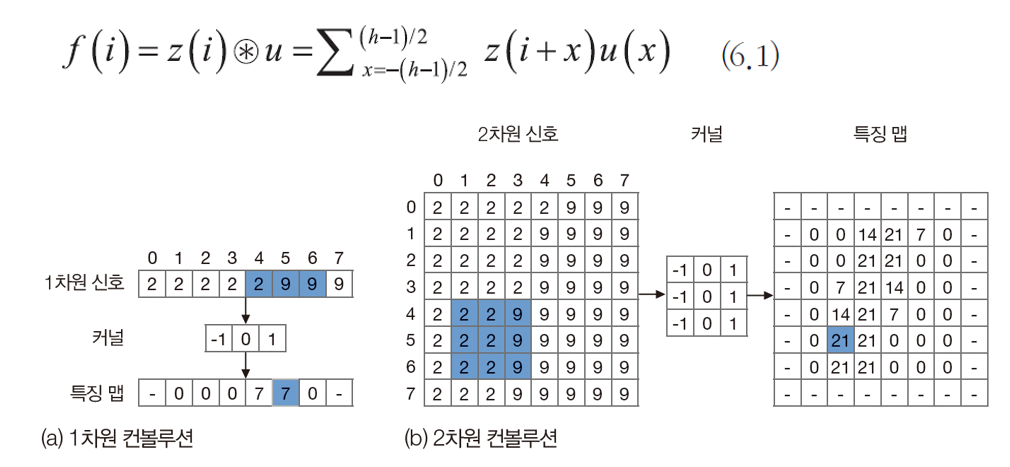

In [2]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/48.PNG", width=500)
# z는 입력신호, u는 커널 , h 는 커널의 크기

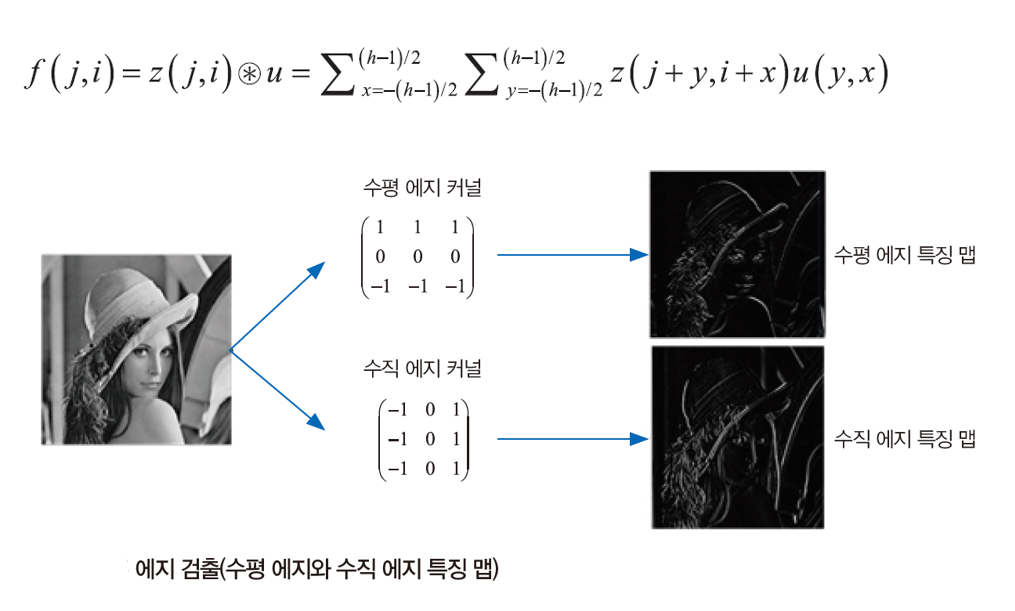

In [6]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/49.PNG", width=500)

In [7]:
# 컨볼류션의 특징
# 커널에 따라서 특징 맵을 추출해 줌
# 원본 영상과 같은 크기의 특징 맵을 생성
# 원본 영상 자체에 연산을 적용->정보손실이 없음
#( 다층 퍼셉트론 2차원구조(텐서) -> 1차원 구조로 펼친 다음에 입력)

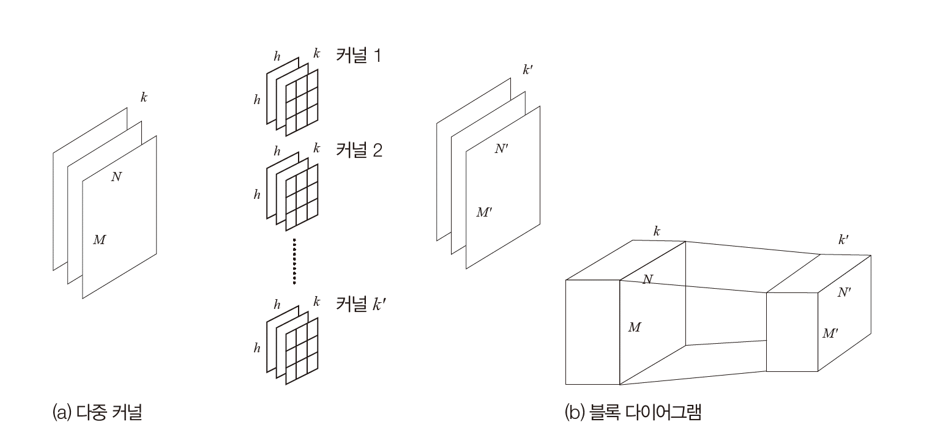

In [3]:
# 다중커널
# 커널을 32, 64, 128개를 사용-> 다중 특징 맵을 추출함
# M*N*K 텐서에 h*h*k 크기의 커널 k`개를 적용하면 M`*N`*K`텐서를 얻음
#(커널은 M과 N축을 따라서 슬라이딩)
# 512*512 RGB 영상  --> 3*3커널을 적용하면 커널 하나당 512*512*3*3*3 = 
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/50.PNG", width=500)

In [4]:
#폴링층
# 최대폴링은 커널안에 있는 화소중에 최대값을 취함(평균폴링은 평균)
# 특징맵에 있는 특징데이터들을 줄여 요약통계량 추출
# 보폭을 s로 하면 특징 맵은 s배만큼 줄어듦

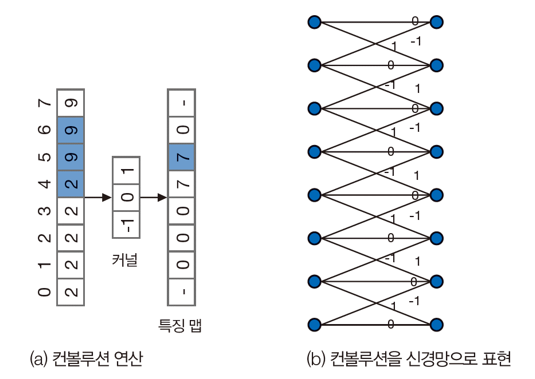

In [6]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/51.PNG", width=500)
# 두 층의 노드 개수를 n1 , n2라고 하고 커널 크기를 h라고 하면 , 컨볼류션 신경망은 h*n2개의 에지(노드) 가짐
# FC(n1*n2)

# 가중치를 공유
# 에지(노드) 는 h*n2개, -> 가중치를 공유하기때문에 가중치는 h개에 불과
# 2차원 영상에서 h*h 커널을 k`개 사용하용 하는 경우 h*h*k`개의 가중치 --> 학습으로 알아내야할 매개변수가
# 대폭줄어듦

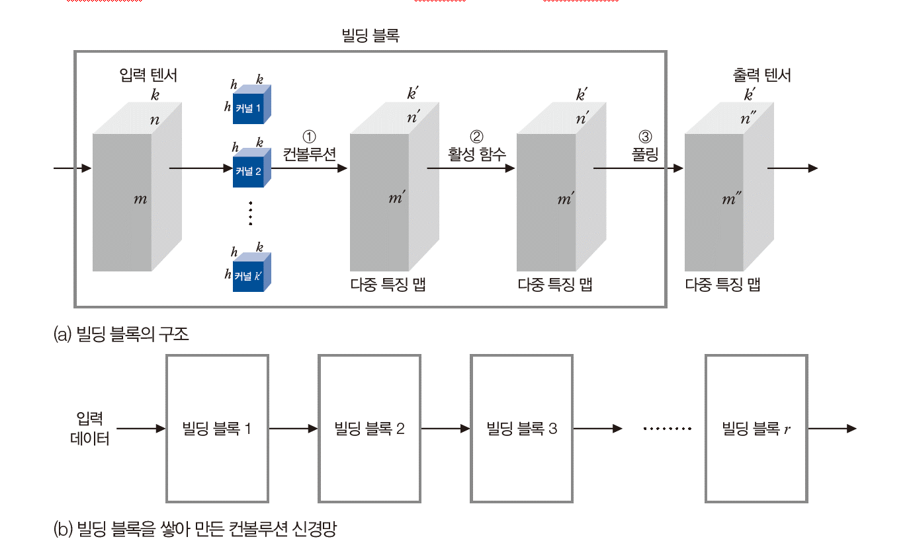

In [9]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/52.PNG", width=700)

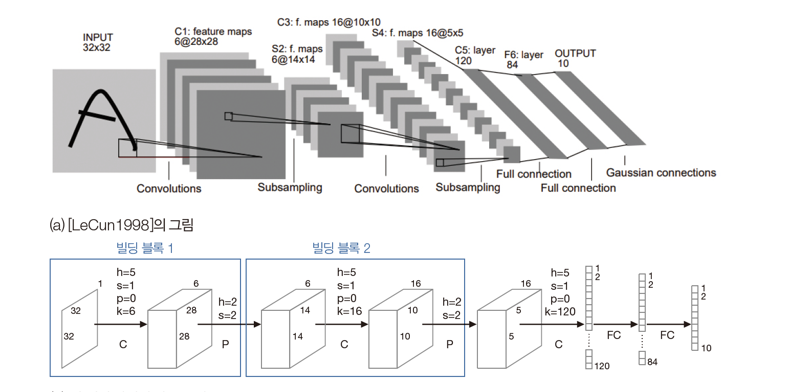

In [10]:
# 신경망을 구성할때...  보통은 C-P-C-P-C-FC-FC (디자인 패턴)

Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/53.PNG", width=700)
# h : 커널크기, s:보폭(슬라이딩), p:뎃데기, k는 커널의 개수
# 커널 5*5 크기를 6개 사용(보폭1)  1*32*32텐서 -> 

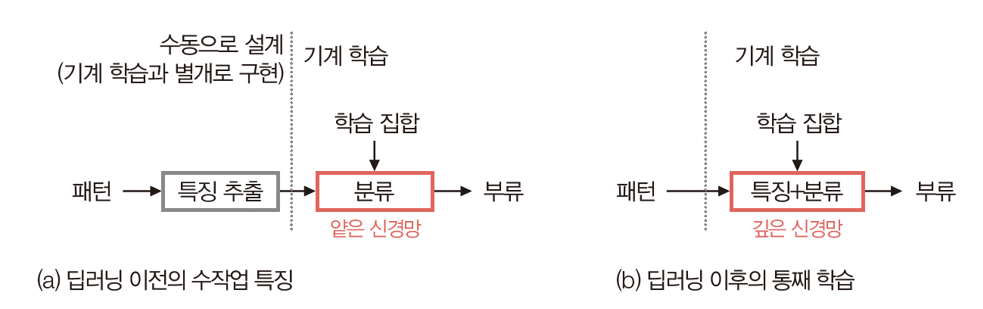

In [11]:
# 딥러닝에 의한 컴퓨터 비전 패러다임의 변화
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/54.PNG", width=500)

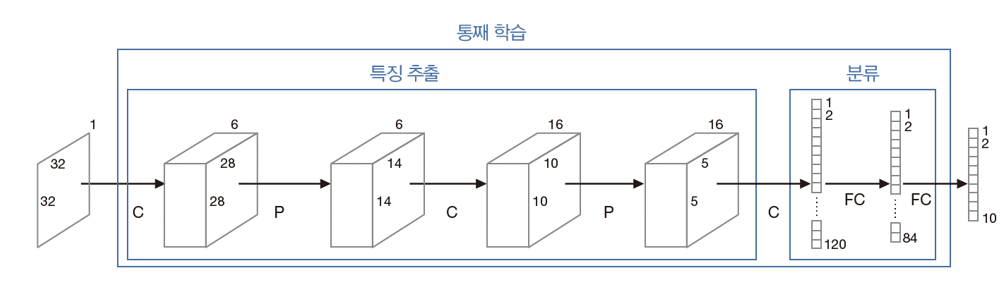

In [14]:
# 딥러닝은 특징을 학습
# 앞부분(컨볼류션층, 폴링칭)은 측징 추출
# 뒷부분 : 분류를 담당
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/55.PNG", width=700)

In [15]:
# 컨볼류션 신경망.... ---> 비전에서 월등한 성능.... Vision 
# 신경망의 깊이를 깊게(Hidden layer를 여러개...)하여 풍부한 특징을 추출 : 수십~수백개의 층
# 데이터의 원래 구조를 유지한 채 특징을 추출
# MNIST 필기 숫자
# Fasin MNIST
# 자연영상 CIFAR-10

In [17]:
# 딥러닝.... c-p-c-p-c-fc-fc  ---> LeNet-5 
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist   # 데이터
from tensorflow.keras.models import Sequential   # FC를위한 시작점
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam

In [24]:
(x_train,y_train),(x_target,y_target) =  mnist.load_data()
x_train =  x_train.reshape(-1,28,28,1)
x_target =  x_target.reshape(-1,28,28,1)
x_train = x_train / 255.0
x_target = x_target / 255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)